Cross model evaluation

Given three folders with similar setup, and same dataset, eval their performance quantitavely

Then create some graphs

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from pathlib import Path
import json
from datetime import datetime
import sys

In [2]:
%load_ext autoreload

In [3]:
from eval_metrics import SEARCH_BEHAVIOUR, METRICS, COHERENCE_MODEL_METRICS
from dataset_loader import GENRES

In [77]:
search_behaviour = SEARCH_BEHAVIOUR.GRID_SEARCH

# dataset_name = GENRES.INDIE

# create the folder name for each model
# indie datetime
# training_datetime_lda = datetime(2024, 2, 16, 0, 32, 46)
# training_datetime_bertopic = datetime(2024, 2, 16, 9, 47, 40)
# training_datetime_bertopic_split = datetime(2024, 2, 14, 11, 15, 56)
# training_datetime_ctm = datetime(2024, 2, 16, 11, 59, 10)
# training_datetime_ctm_split = datetime(2024, 2, 14, 22, 4, 32)

# action datetime
# training_datetime_lda = datetime(2024, 2, 27, 9, 18, 50)
# training_datetime_bertopic = datetime(2024, 2, 29,23, 51, 15)
# training_datetime_bertopic_split = datetime(2024, 3, 1, 9, 51, 49)
# training_datetime_ctm = datetime(2024, 2, 29, 0, 55, 30)
# training_datetime_ctm_split = datetime(2024, 2, 29, 8, 43, 52)

# all_review_text
dataset_name = -1
training_datetime_lda = datetime(2024, 2, 20, 1, 4, 8)
training_datetime_bertopic = datetime(2024, 2, 21, 16, 30, 28)
training_datetime_bertopic_split = datetime(2024, 2, 23, 23, 37, 39)
training_datetime_ctm = datetime(2024, 2, 23, 0, 8, 27)
training_datetime_ctm_split = datetime(2024, 2, 24, 14, 32, 52)


# dataset type
if type(dataset_name) == GENRES:
    dataset_type_folder = Path(f'category_{str(dataset_name)}_unique_review_text')
else:
    dataset_type_folder = Path(f'category_all_unique_review_text')

lda_folder = Path('lda_dev')
bertopic_folder = Path('bertopic_dev')
ctm_folder = Path('ctm_dev')

if type(dataset_name) == GENRES:
    training_folder_lda = lda_folder / dataset_type_folder / f'lda_multicore_genre_{str(dataset_name)}_{search_behaviour.value}_{training_datetime_lda.strftime("%Y%m%d_%H%M%S")}'
    training_folder_bertopic = bertopic_folder / dataset_type_folder / f'bertopic_genre_{str(dataset_name)}_{search_behaviour.value}_{training_datetime_bertopic.strftime("%Y%m%d_%H%M%S")}'
    training_folder_bertopic_split = bertopic_folder / dataset_type_folder / f'bertopic[split]_genre_{str(dataset_name)}_{search_behaviour.value}_{training_datetime_bertopic_split.strftime("%Y%m%d_%H%M%S")}'
    training_folder_ctm = ctm_folder / dataset_type_folder / f'ctm_genre_{str(dataset_name)}_{search_behaviour.value}_{training_datetime_ctm.strftime("%Y%m%d_%H%M%S")}'
    training_folder_ctm_split = ctm_folder / dataset_type_folder / f'ctm[split]_genre_{str(dataset_name)}_{search_behaviour.value}_{training_datetime_ctm_split.strftime("%Y%m%d_%H%M%S")}'
else:
    training_folder_lda = lda_folder / dataset_type_folder / f'lda_multicore_{search_behaviour.value}_{training_datetime_lda.strftime("%Y%m%d_%H%M%S")}'
    training_folder_bertopic = bertopic_folder / dataset_type_folder / f'bertopic_{search_behaviour.value}_{training_datetime_bertopic.strftime("%Y%m%d_%H%M%S")}'
    training_folder_bertopic_split = bertopic_folder / dataset_type_folder / f'bertopic[split]_{search_behaviour.value}_{training_datetime_bertopic_split.strftime("%Y%m%d_%H%M%S")}'
    training_folder_ctm = ctm_folder / dataset_type_folder / f'ctm_{search_behaviour.value}_{training_datetime_ctm.strftime("%Y%m%d_%H%M%S")}'
    training_folder_ctm_split = ctm_folder / dataset_type_folder / f'ctm[split]_{search_behaviour.value}_{training_datetime_ctm_split.strftime("%Y%m%d_%H%M%S")}'

# check each model folder exists
if not training_folder_lda.exists():
    print(f"Folder {training_folder_lda} does not exist")
    sys.exit(1)
if not training_folder_bertopic.exists():
    print(f"Folder {training_folder_bertopic} does not exist")
    sys.exit(1)
if not training_folder_bertopic_split.exists():
    print(f"Folder {training_folder_bertopic_split} does not exist")
    sys.exit(1)
if not training_folder_ctm.exists():
    print(f"Folder {training_folder_ctm} does not exist")
    sys.exit(1)
if not training_folder_ctm_split.exists():
    print(f"Folder {training_folder_ctm_split} does not exist")
    sys.exit(1)

print('Found training folder lda:', training_folder_lda)
print('Found training folder bertopic:', training_folder_bertopic)
print('Found training folder bertopic split:', training_folder_bertopic_split)
print('Found training folder ctm:', training_folder_ctm)
print('Found training folder ctm split:', training_folder_ctm_split)

Found training folder lda: lda_dev/category_all_unique_review_text/lda_multicore_grid_search_20240220_010408
Found training folder bertopic: bertopic_dev/category_all_unique_review_text/bertopic_grid_search_20240221_163028
Found training folder bertopic split: bertopic_dev/category_all_unique_review_text/bertopic[split]_grid_search_20240223_233739
Found training folder ctm: ctm_dev/category_all_unique_review_text/ctm_grid_search_20240223_000827
Found training folder ctm split: ctm_dev/category_all_unique_review_text/ctm[split]_grid_search_20240224_143252


In [78]:
# load the config and result files
config_dicts = {}
result_dicts = {}

for model_type, training_folder in zip(
    ['lda', 'bertopic', 'bertopic[split]', 'ctm', 'ctm[split]'], 
    [training_folder_lda, training_folder_bertopic, training_folder_bertopic_split, training_folder_ctm, training_folder_ctm_split]):
    config_file = training_folder / 'config.json'
    result_file = training_folder / 'result.json'

    with open(config_file, 'r') as f:
        config = json.load(f)
    with open(result_file, 'r') as f:
        result = json.load(f)

    config_dicts[model_type] = config
    result_dicts[model_type] = result

config_dicts

{'lda': {'model': 'lda_multicore',
  'dataset_path': 'dev-workspace/dataset/topic_modelling/00_dataset_filtered_all_4045065.pkl',
  'countvect_params': {'n_frequency': 70, 'ngram_range': [1, 1]},
  'lda_params': {'workers': 3,
   'chunksize': 2024,
   'passes': 10,
   'alpha': 'symmetric',
   'eta': None,
   'decay': 0.5,
   'offset': 1.0,
   'eval_every': 10,
   'iterations': 50,
   'gamma_threshold': 0.001,
   'minimum_probability': 0.01,
   'random_state': 42,
   'minimum_phi_value': 0.01,
   'per_word_topics': False,
   'dtype': "<class 'numpy.float32'>"},
  'search_space': {'lda_params': {'num_topics': [10,
     20,
     30,
     40,
     50,
     60,
     70,
     80,
     90,
     100]}},
  'metrics': ['c_npmi',
   'c_v',
   'u_mass',
   'c_uci',
   'topic_diversity',
   'inverted_rbo',
   'pairwise_jaccard_similarity'],
  'monitor': 'c_npmi',
  'search_behaviour': 'grid_search',
  'gensim_version': '4.3.2'},
 'bertopic': {'model': 'bertopic',
  'dataset_path': 'dev-workspace/da

---

View result of each model

In [79]:
# from: https://www.freecodecamp.org/news/how-to-flatten-a-dictionary-in-python-in-4-different-ways/
from collections.abc import MutableMapping

def _flatten_dict_gen(d, parent_key, sep):
    for k, v in d.items():
        new_key = parent_key + sep + k if parent_key else k
        if isinstance(v, MutableMapping):
            yield from flatten_dict(v, new_key, sep=sep).items()
        else:
            yield new_key, v


def flatten_dict(d: MutableMapping, parent_key: str = '', sep: str = '.'):
    return dict(_flatten_dict_gen(d, parent_key, sep))

def get_log_history_df(model_type):

    if model_type not in ['lda', 'bertopic', 'bertopic[split]', 'ctm', 'ctm[split]']:
        return None

    log_history = result_dicts[model_type]['log_history']


    # for each dictionary in the log_history list
    # convert them to a flattened dictionary
    # then append to a list
    log_history_flattened = [flatten_dict(log, sep='.') for log in log_history]
    log_history_flattened
    log_history_df = pd.DataFrame(log_history_flattened)

    # append a column to the dataframe for the model type
    log_history_df['model_type'] = model_type

    return log_history_df

In [80]:
# LDA log history

log_history_lda_df = get_log_history_df('lda')
log_history_lda_df

,c_npmi,c_v,u_mass,c_uci,topic_diversity,inverted_rbo,pairwise_jaccard_similarity,model_name,hyperparameters.countvect_params.ngram_range,hyperparameters.lda_params.workers,...,hyperparameters.lda_params.eval_every,hyperparameters.lda_params.iterations,hyperparameters.lda_params.gamma_threshold,hyperparameters.lda_params.minimum_probability,hyperparameters.lda_params.random_state,hyperparameters.lda_params.minimum_phi_value,hyperparameters.lda_params.per_word_topics,hyperparameters.lda_params.dtype,hyperparameters.lda_params.num_topics,model_type
0,0.054228,0.499165,-2.223558,0.389660,0.800000,0.926308,0.046050,lda_num_topics_10,"[1, 1]",3,...,10,50,0.001,0.01,42,0.01,False,<class 'numpy.float32'>,10,lda
1,0.051707,0.482576,-2.581262,0.382852,0.815000,0.974442,0.015493,lda_num_topics_20,"[1, 1]",3,...,10,50,0.001,0.01,42,0.01,False,<class 'numpy.float32'>,20,lda
2,0.054242,0.492511,-2.815733,0.412506,0.786667,0.975548,0.015321,lda_num_topics_30,"[1, 1]",3,...,10,50,0.001,0.01,42,0.01,False,<class 'numpy.float32'>,30,lda
3,0.040327,0.460607,-3.124918,0.290264,0.830000,0.985564,0.010619,lda_num_topics_40,"[1, 1]",3,...,10,50,0.001,0.01,42,0.01,False,<class 'numpy.float32'>,40,lda
4,0.048046,0.474409,-3.231494,0.358464,0.864000,0.992344,0.005063,lda_num_topics_50,"[1, 1]",3,...,10,50,0.001,0.01,42,0.01,False,<class 'numpy.float32'>,50,lda
5,0.025237,0.434536,-3.396810,0.147912,0.860000,0.988623,0.008783,lda_num_topics_60,"[1, 1]",3,...,10,50,0.001,0.01,42,0.01,False,<class 'numpy.float32'>,60,lda
6,0.020735,0.422741,-3.631082,0.100171,0.894286,0.995196,0.003360,lda_num_topics_70,"[1, 1]",3,...,10,50,0.001,0.01,42,0.01,False,<class 'numpy.float32'>,70,lda
7,0.017787,0.414631,-3.631907,0.079257,0.886250,0.991559,0.006847,lda_num_topics_80,"[1, 1]",3,...,10,50,0.001,0.01,42,0.01,False,<class 'numpy.float32'>,80,lda
8,0.012059,0.406838,-3.687599,0.027111,0.897778,0.992813,0.005805,lda_num_topics_90,"[1, 1]",3,...,10,50,0.001,0.01,42,0.01,False,<class 'numpy.float32'>,90,lda
9,0.007459,0.395448,-3.806740,-0.023624,0.909000,0.993799,0.005224,lda_num_topics_100,"[1, 1]",3,...,10,50,0.001,0.01,42,0.01,False,<class 'numpy.float32'>,100,lda


In [81]:
# bertopic log history

log_history_bertopic_df = get_log_history_df('bertopic')
log_history_bertopic_df

,c_npmi,c_v,u_mass,c_uci,topic_diversity,inverted_rbo,pairwise_jaccard_similarity,model_name,hyperparameters.sbert_params.model_name_or_path,hyperparameters.vocab_tokenizer_params.ngram_range,...,hyperparameters.umap_params.random_state,hyperparameters.hdbscan_params.min_cluster_size,hyperparameters.hdbscan_params.min_samples,hyperparameters.hdbscan_params.metric,hyperparameters.hdbscan_params.prediction_data,hyperparameters.bertopic_params.language,hyperparameters.bertopic_params.top_n_words,hyperparameters.bertopic_params.calculate_probabilities,hyperparameters.bertopic_params.nr_topics,model_type
0,0.110427,0.557348,-0.010804,1.137459,0.770000,0.933032,0.066745,bt_nr_topics_10,all-MiniLM-L6-v2,"[1, 1]",...,None,4004,5,euclidean,True,english,10,True,11,bertopic
1,0.111896,0.569225,-0.015072,1.139267,0.775000,0.949317,0.050442,bt_nr_topics_20,all-MiniLM-L6-v2,"[1, 1]",...,None,4004,5,euclidean,True,english,10,True,21,bertopic
2,0.132000,0.602135,-0.017467,1.341748,0.773333,0.968826,0.033032,bt_nr_topics_30,all-MiniLM-L6-v2,"[1, 1]",...,None,4004,5,euclidean,True,english,10,True,31,bertopic
3,0.135954,0.608660,-0.034445,1.379438,0.767500,0.977642,0.024204,bt_nr_topics_40,all-MiniLM-L6-v2,"[1, 1]",...,None,4004,5,euclidean,True,english,10,True,41,bertopic
4,0.135688,0.612089,-0.028722,1.327481,0.756000,0.980064,0.021867,bt_nr_topics_50,all-MiniLM-L6-v2,"[1, 1]",...,None,4004,5,euclidean,True,english,10,True,51,bertopic
5,0.136438,0.612802,-0.031324,1.339444,0.735000,0.981771,0.020019,bt_nr_topics_60,all-MiniLM-L6-v2,"[1, 1]",...,None,4004,5,euclidean,True,english,10,True,61,bertopic
6,0.142100,0.628026,-0.043108,1.369409,0.748571,0.987014,0.013105,bt_nr_topics_70,all-MiniLM-L6-v2,"[1, 1]",...,None,4004,5,euclidean,True,english,10,True,71,bertopic
7,0.154699,0.649271,-0.053728,1.560618,0.735000,0.989259,0.010913,bt_nr_topics_80,all-MiniLM-L6-v2,"[1, 1]",...,None,4004,5,euclidean,True,english,10,True,81,bertopic
8,0.146152,0.632680,-0.055752,1.429980,0.717778,0.988212,0.011554,bt_nr_topics_90,all-MiniLM-L6-v2,"[1, 1]",...,None,4004,5,euclidean,True,english,10,True,91,bertopic
9,0.158572,0.654494,-0.066100,1.593415,0.712000,0.989221,0.010624,bt_nr_topics_100,all-MiniLM-L6-v2,"[1, 1]",...,None,4004,5,euclidean,True,english,10,True,101,bertopic


In [82]:
# bertopic log history

log_history_bertopic_split_df = get_log_history_df('bertopic[split]')
log_history_bertopic_split_df

,c_npmi,c_v,u_mass,c_uci,topic_diversity,inverted_rbo,pairwise_jaccard_similarity,model_name,hyperparameters.sbert_params.model_name_or_path,hyperparameters.vocab_tokenizer_params.ngram_range,...,hyperparameters.umap_params.random_state,hyperparameters.hdbscan_params.min_cluster_size,hyperparameters.hdbscan_params.min_samples,hyperparameters.hdbscan_params.metric,hyperparameters.hdbscan_params.prediction_data,hyperparameters.bertopic_params.language,hyperparameters.bertopic_params.top_n_words,hyperparameters.bertopic_params.calculate_probabilities,hyperparameters.bertopic_params.nr_topics,model_type
0,0.101159,0.545996,-0.008885,1.032166,0.800000,0.941750,0.049331,bt_nr_topics_10,all-MiniLM-L6-v2,"[1, 1]",...,None,4004,5,euclidean,True,english,10,True,11,bertopic[split]
1,0.109376,0.571037,-0.013451,1.108545,0.760000,0.953346,0.050985,bt_nr_topics_20,all-MiniLM-L6-v2,"[1, 1]",...,None,4004,5,euclidean,True,english,10,True,21,bertopic[split]
2,0.143278,0.626585,-0.023756,1.458375,0.800000,0.976094,0.025443,bt_nr_topics_30,all-MiniLM-L6-v2,"[1, 1]",...,None,4004,5,euclidean,True,english,10,True,31,bertopic[split]
3,0.137494,0.603738,-0.031277,1.380410,0.760000,0.974394,0.027409,bt_nr_topics_40,all-MiniLM-L6-v2,"[1, 1]",...,None,4004,5,euclidean,True,english,10,True,41,bertopic[split]
4,0.144599,0.619888,-0.035603,1.454678,0.768000,0.981932,0.018981,bt_nr_topics_50,all-MiniLM-L6-v2,"[1, 1]",...,None,4004,5,euclidean,True,english,10,True,51,bertopic[split]
5,0.142627,0.617144,-0.039011,1.389174,0.765000,0.985611,0.015107,bt_nr_topics_60,all-MiniLM-L6-v2,"[1, 1]",...,None,4004,5,euclidean,True,english,10,True,61,bertopic[split]
6,0.155069,0.642754,-0.053375,1.551856,0.757143,0.988548,0.012179,bt_nr_topics_70,all-MiniLM-L6-v2,"[1, 1]",...,None,4004,5,euclidean,True,english,10,True,71,bertopic[split]
7,0.158605,0.650469,-0.063069,1.591251,0.760000,0.990162,0.009993,bt_nr_topics_80,all-MiniLM-L6-v2,"[1, 1]",...,None,4004,5,euclidean,True,english,10,True,81,bertopic[split]
8,0.158257,0.649536,-0.069072,1.577995,0.731111,0.988192,0.011827,bt_nr_topics_90,all-MiniLM-L6-v2,"[1, 1]",...,None,4004,5,euclidean,True,english,10,True,91,bertopic[split]
9,0.164958,0.658446,-0.084397,1.645096,0.738000,0.991545,0.008337,bt_nr_topics_100,all-MiniLM-L6-v2,"[1, 1]",...,None,4004,5,euclidean,True,english,10,True,101,bertopic[split]


In [83]:
# CTM log history

log_history_ctm_df = get_log_history_df('ctm')
log_history_ctm_df

,c_npmi,c_v,u_mass,c_uci,topic_diversity,inverted_rbo,pairwise_jaccard_similarity,model_name,hyperparameters.sbert_params.model_name_or_path,hyperparameters.countvect_params.max_features,...,hyperparameters.ctm_params.hidden_sizes,hyperparameters.ctm_params.dropout,hyperparameters.ctm_params.lr,hyperparameters.ctm_params.momentum,hyperparameters.ctm_params.solver,hyperparameters.ctm_params.num_epochs,hyperparameters.ctm_params.n_components,hyperparameters.ctm_params.bow_size,hyperparameters.ctm_params.contextual_size,model_type
0,0.000250,0.415863,-0.009421,-0.520894,0.900000,0.986473,0.013255,ctm_n_components_10,all-MiniLM-L6-v2,2000,...,"[100, 100]",0.2,0.002,0.99,adam,25,10,2000,384,ctm
1,0.035112,0.492940,-0.005815,0.043943,0.895000,0.993130,0.007041,ctm_n_components_20,all-MiniLM-L6-v2,2000,...,"[100, 100]",0.2,0.002,0.99,adam,25,20,2000,384,ctm
2,0.039403,0.497017,-0.010731,0.139171,0.856667,0.992208,0.006875,ctm_n_components_30,all-MiniLM-L6-v2,2000,...,"[100, 100]",0.2,0.002,0.99,adam,25,30,2000,384,ctm
3,0.040844,0.496015,-0.009868,0.202412,0.765000,0.988489,0.009958,ctm_n_components_40,all-MiniLM-L6-v2,2000,...,"[100, 100]",0.2,0.002,0.99,adam,25,40,2000,384,ctm
4,0.030754,0.479154,-0.016992,-0.033066,0.628000,0.981566,0.015314,ctm_n_components_50,all-MiniLM-L6-v2,2000,...,"[100, 100]",0.2,0.002,0.99,adam,25,50,2000,384,ctm
5,0.039272,0.481136,-0.011844,0.224677,0.576667,0.979823,0.016649,ctm_n_components_60,all-MiniLM-L6-v2,2000,...,"[100, 100]",0.2,0.002,0.99,adam,25,60,2000,384,ctm
6,0.027564,0.454706,-0.014307,0.043301,0.477143,0.964552,0.028133,ctm_n_components_70,all-MiniLM-L6-v2,2000,...,"[100, 100]",0.2,0.002,0.99,adam,25,70,2000,384,ctm
7,0.029796,0.459741,-0.023759,0.095892,0.423750,0.950881,0.035506,ctm_n_components_80,all-MiniLM-L6-v2,2000,...,"[100, 100]",0.2,0.002,0.99,adam,25,80,2000,384,ctm
8,0.023837,0.447905,-0.018008,0.004771,0.401111,0.954000,0.033219,ctm_n_components_90,all-MiniLM-L6-v2,2000,...,"[100, 100]",0.2,0.002,0.99,adam,25,90,2000,384,ctm
9,0.027386,0.451009,-0.019650,0.067150,0.369000,0.951751,0.034091,ctm_n_components_100,all-MiniLM-L6-v2,2000,...,"[100, 100]",0.2,0.002,0.99,adam,25,100,2000,384,ctm


In [84]:
# CTM log history

log_history_ctm_split_df = get_log_history_df('ctm[split]')
log_history_ctm_split_df

,c_npmi,c_v,u_mass,c_uci,topic_diversity,inverted_rbo,pairwise_jaccard_similarity,model_name,hyperparameters.sbert_params.model_name_or_path,hyperparameters.countvect_params.max_features,...,hyperparameters.ctm_params.hidden_sizes,hyperparameters.ctm_params.dropout,hyperparameters.ctm_params.lr,hyperparameters.ctm_params.momentum,hyperparameters.ctm_params.solver,hyperparameters.ctm_params.num_epochs,hyperparameters.ctm_params.n_components,hyperparameters.ctm_params.bow_size,hyperparameters.ctm_params.contextual_size,model_type
0,-0.034965,0.417971,-0.001488,-1.321565,0.870000,0.973526,0.023415,ctm_n_components_10,all-MiniLM-L6-v2,2000,...,"[100, 100]",0.2,0.002,0.99,adam,25,10,2000,384,ctm[split]
1,0.004701,0.482971,-0.001389,-0.673182,0.855000,0.984677,0.014448,ctm_n_components_20,all-MiniLM-L6-v2,2000,...,"[100, 100]",0.2,0.002,0.99,adam,25,20,2000,384,ctm[split]
2,0.022813,0.490604,-0.015238,-0.179707,0.870000,0.991646,0.009222,ctm_n_components_30,all-MiniLM-L6-v2,2000,...,"[100, 100]",0.2,0.002,0.99,adam,25,30,2000,384,ctm[split]
3,0.028211,0.502264,-0.005717,-0.156813,0.832500,0.990398,0.008486,ctm_n_components_40,all-MiniLM-L6-v2,2000,...,"[100, 100]",0.2,0.002,0.99,adam,25,40,2000,384,ctm[split]
4,0.029472,0.490986,-0.021556,-0.080157,0.738000,0.987858,0.010204,ctm_n_components_50,all-MiniLM-L6-v2,2000,...,"[100, 100]",0.2,0.002,0.99,adam,25,50,2000,384,ctm[split]
5,0.030421,0.488025,-0.029864,-0.070387,0.650000,0.986127,0.011399,ctm_n_components_60,all-MiniLM-L6-v2,2000,...,"[100, 100]",0.2,0.002,0.99,adam,25,60,2000,384,ctm[split]
6,0.030407,0.498162,-0.024220,-0.077678,0.604286,0.984081,0.013264,ctm_n_components_70,all-MiniLM-L6-v2,2000,...,"[100, 100]",0.2,0.002,0.99,adam,25,70,2000,384,ctm[split]
7,0.027625,0.485381,-0.035336,-0.063053,0.541250,0.980057,0.016581,ctm_n_components_80,all-MiniLM-L6-v2,2000,...,"[100, 100]",0.2,0.002,0.99,adam,25,80,2000,384,ctm[split]
8,0.029051,0.484777,-0.023525,-0.022831,0.487778,0.976679,0.019344,ctm_n_components_90,all-MiniLM-L6-v2,2000,...,"[100, 100]",0.2,0.002,0.99,adam,25,90,2000,384,ctm[split]
9,0.024642,0.467624,-0.026499,-0.070140,0.434000,0.968612,0.024003,ctm_n_components_100,all-MiniLM-L6-v2,2000,...,"[100, 100]",0.2,0.002,0.99,adam,25,100,2000,384,ctm[split]


Then group all the models, keeping only the model name and the metric

use the model name as the key to view hyperparameter of the model

In [85]:
metrics_names = [m.value for m in METRICS]

interested_columns = metrics_names + ['model_type', 'model_name']

# concat the three log history dataframe with only the interested columns
log_history_df = pd.concat(
    [log_history_lda_df, log_history_bertopic_df, log_history_bertopic_split_df, log_history_ctm_df, log_history_ctm_split_df]
)[interested_columns]

log_history_df

,u_mass,c_v,c_uci,c_npmi,topic_diversity,inverted_rbo,pairwise_jaccard_similarity,model_type,model_name
0,-2.223558,0.499165,0.389660,0.054228,0.800000,0.926308,0.046050,lda,lda_num_topics_10
1,-2.581262,0.482576,0.382852,0.051707,0.815000,0.974442,0.015493,lda,lda_num_topics_20
2,-2.815733,0.492511,0.412506,0.054242,0.786667,0.975548,0.015321,lda,lda_num_topics_30
3,-3.124918,0.460607,0.290264,0.040327,0.830000,0.985564,0.010619,lda,lda_num_topics_40
4,-3.231494,0.474409,0.358464,0.048046,0.864000,0.992344,0.005063,lda,lda_num_topics_50
5,-3.396810,0.434536,0.147912,0.025237,0.860000,0.988623,0.008783,lda,lda_num_topics_60
6,-3.631082,0.422741,0.100171,0.020735,0.894286,0.995196,0.003360,lda,lda_num_topics_70
7,-3.631907,0.414631,0.079257,0.017787,0.886250,0.991559,0.006847,lda,lda_num_topics_80
8,-3.687599,0.406838,0.027111,0.012059,0.897778,0.992813,0.005805,lda,lda_num_topics_90
9,-3.806740,0.395448,-0.023624,0.007459,0.909000,0.993799,0.005224,lda,lda_num_topics_100


In [86]:
# get number of topics, (by the last two-three digits of the model name)

log_history_df['num_topics'] = log_history_df['model_name'].str.extract(r'(\d{2,3})$').astype(int)
log_history_df

,u_mass,c_v,c_uci,c_npmi,topic_diversity,inverted_rbo,pairwise_jaccard_similarity,model_type,model_name,num_topics
0,-2.223558,0.499165,0.389660,0.054228,0.800000,0.926308,0.046050,lda,lda_num_topics_10,10
1,-2.581262,0.482576,0.382852,0.051707,0.815000,0.974442,0.015493,lda,lda_num_topics_20,20
2,-2.815733,0.492511,0.412506,0.054242,0.786667,0.975548,0.015321,lda,lda_num_topics_30,30
3,-3.124918,0.460607,0.290264,0.040327,0.830000,0.985564,0.010619,lda,lda_num_topics_40,40
4,-3.231494,0.474409,0.358464,0.048046,0.864000,0.992344,0.005063,lda,lda_num_topics_50,50
5,-3.396810,0.434536,0.147912,0.025237,0.860000,0.988623,0.008783,lda,lda_num_topics_60,60
6,-3.631082,0.422741,0.100171,0.020735,0.894286,0.995196,0.003360,lda,lda_num_topics_70,70
7,-3.631907,0.414631,0.079257,0.017787,0.886250,0.991559,0.006847,lda,lda_num_topics_80,80
8,-3.687599,0.406838,0.027111,0.012059,0.897778,0.992813,0.005805,lda,lda_num_topics_90,90
9,-3.806740,0.395448,-0.023624,0.007459,0.909000,0.993799,0.005224,lda,lda_num_topics_100,100


In [87]:
# with that information, we can sort by different metrics

# sort by c_v
log_history_df.sort_values(by='c_v', ascending=False)

,u_mass,c_v,c_uci,c_npmi,topic_diversity,inverted_rbo,pairwise_jaccard_similarity,model_type,model_name,num_topics
9,-0.084397,0.658446,1.645096,0.164958,0.738000,0.991545,0.008337,bertopic[split],bt_nr_topics_100,100
9,-0.066100,0.654494,1.593415,0.158572,0.712000,0.989221,0.010624,bertopic,bt_nr_topics_100,100
7,-0.063069,0.650469,1.591251,0.158605,0.760000,0.990162,0.009993,bertopic[split],bt_nr_topics_80,80
8,-0.069072,0.649536,1.577995,0.158257,0.731111,0.988192,0.011827,bertopic[split],bt_nr_topics_90,90
7,-0.053728,0.649271,1.560618,0.154699,0.735000,0.989259,0.010913,bertopic,bt_nr_topics_80,80
6,-0.053375,0.642754,1.551856,0.155069,0.757143,0.988548,0.012179,bertopic[split],bt_nr_topics_70,70
8,-0.055752,0.632680,1.429980,0.146152,0.717778,0.988212,0.011554,bertopic,bt_nr_topics_90,90
6,-0.043108,0.628026,1.369409,0.142100,0.748571,0.987014,0.013105,bertopic,bt_nr_topics_70,70
2,-0.023756,0.626585,1.458375,0.143278,0.800000,0.976094,0.025443,bertopic[split],bt_nr_topics_30,30
4,-0.035603,0.619888,1.454678,0.144599,0.768000,0.981932,0.018981,bertopic[split],bt_nr_topics_50,50


In [88]:
# sort by c_npmi

log_history_df.sort_values(by='c_npmi', ascending=False)

,u_mass,c_v,c_uci,c_npmi,topic_diversity,inverted_rbo,pairwise_jaccard_similarity,model_type,model_name,num_topics
9,-0.084397,0.658446,1.645096,0.164958,0.738000,0.991545,0.008337,bertopic[split],bt_nr_topics_100,100
7,-0.063069,0.650469,1.591251,0.158605,0.760000,0.990162,0.009993,bertopic[split],bt_nr_topics_80,80
9,-0.066100,0.654494,1.593415,0.158572,0.712000,0.989221,0.010624,bertopic,bt_nr_topics_100,100
8,-0.069072,0.649536,1.577995,0.158257,0.731111,0.988192,0.011827,bertopic[split],bt_nr_topics_90,90
6,-0.053375,0.642754,1.551856,0.155069,0.757143,0.988548,0.012179,bertopic[split],bt_nr_topics_70,70
7,-0.053728,0.649271,1.560618,0.154699,0.735000,0.989259,0.010913,bertopic,bt_nr_topics_80,80
8,-0.055752,0.632680,1.429980,0.146152,0.717778,0.988212,0.011554,bertopic,bt_nr_topics_90,90
4,-0.035603,0.619888,1.454678,0.144599,0.768000,0.981932,0.018981,bertopic[split],bt_nr_topics_50,50
2,-0.023756,0.626585,1.458375,0.143278,0.800000,0.976094,0.025443,bertopic[split],bt_nr_topics_30,30
5,-0.039011,0.617144,1.389174,0.142627,0.765000,0.985611,0.015107,bertopic[split],bt_nr_topics_60,60


In [89]:
# sort by inverted rbo (an indicator of diversity), The higher the better

log_history_df.sort_values(by='inverted_rbo', ascending=False)

,u_mass,c_v,c_uci,c_npmi,topic_diversity,inverted_rbo,pairwise_jaccard_similarity,model_type,model_name,num_topics
6,-3.631082,0.422741,0.100171,0.020735,0.894286,0.995196,0.003360,lda,lda_num_topics_70,70
9,-3.806740,0.395448,-0.023624,0.007459,0.909000,0.993799,0.005224,lda,lda_num_topics_100,100
1,-0.005815,0.492940,0.043943,0.035112,0.895000,0.993130,0.007041,ctm,ctm_n_components_20,20
8,-3.687599,0.406838,0.027111,0.012059,0.897778,0.992813,0.005805,lda,lda_num_topics_90,90
4,-3.231494,0.474409,0.358464,0.048046,0.864000,0.992344,0.005063,lda,lda_num_topics_50,50
2,-0.010731,0.497017,0.139171,0.039403,0.856667,0.992208,0.006875,ctm,ctm_n_components_30,30
2,-0.015238,0.490604,-0.179707,0.022813,0.870000,0.991646,0.009222,ctm[split],ctm_n_components_30,30
7,-3.631907,0.414631,0.079257,0.017787,0.886250,0.991559,0.006847,lda,lda_num_topics_80,80
9,-0.084397,0.658446,1.645096,0.164958,0.738000,0.991545,0.008337,bertopic[split],bt_nr_topics_100,100
3,-0.005717,0.502264,-0.156813,0.028211,0.832500,0.990398,0.008486,ctm[split],ctm_n_components_40,40


In [90]:
# sort by jaccard simularity, the higher the better (an indicator of similarity)
# (an inverse of diversity, hence not that useful)

log_history_df.sort_values(by='pairwise_jaccard_similarity', ascending=False)

,u_mass,c_v,c_uci,c_npmi,topic_diversity,inverted_rbo,pairwise_jaccard_similarity,model_type,model_name,num_topics
0,-0.010804,0.557348,1.137459,0.110427,0.770000,0.933032,0.066745,bertopic,bt_nr_topics_10,10
1,-0.013451,0.571037,1.108545,0.109376,0.760000,0.953346,0.050985,bertopic[split],bt_nr_topics_20,20
1,-0.015072,0.569225,1.139267,0.111896,0.775000,0.949317,0.050442,bertopic,bt_nr_topics_20,20
0,-0.008885,0.545996,1.032166,0.101159,0.800000,0.941750,0.049331,bertopic[split],bt_nr_topics_10,10
0,-2.223558,0.499165,0.389660,0.054228,0.800000,0.926308,0.046050,lda,lda_num_topics_10,10
7,-0.023759,0.459741,0.095892,0.029796,0.423750,0.950881,0.035506,ctm,ctm_n_components_80,80
9,-0.019650,0.451009,0.067150,0.027386,0.369000,0.951751,0.034091,ctm,ctm_n_components_100,100
8,-0.018008,0.447905,0.004771,0.023837,0.401111,0.954000,0.033219,ctm,ctm_n_components_90,90
2,-0.017467,0.602135,1.341748,0.132000,0.773333,0.968826,0.033032,bertopic,bt_nr_topics_30,30
6,-0.014307,0.454706,0.043301,0.027564,0.477143,0.964552,0.028133,ctm,ctm_n_components_70,70


Find the best model with a fixed number of topics

In [91]:
# given a fixed range of topics

topic_range = [30, 60]

log_history_df_subtopic = log_history_df[
    (log_history_df['num_topics'] >= topic_range[0]) & (log_history_df['num_topics'] <= topic_range[1])
]

log_history_df_subtopic

,u_mass,c_v,c_uci,c_npmi,topic_diversity,inverted_rbo,pairwise_jaccard_similarity,model_type,model_name,num_topics
2,-2.815733,0.492511,0.412506,0.054242,0.786667,0.975548,0.015321,lda,lda_num_topics_30,30
3,-3.124918,0.460607,0.290264,0.040327,0.830000,0.985564,0.010619,lda,lda_num_topics_40,40
4,-3.231494,0.474409,0.358464,0.048046,0.864000,0.992344,0.005063,lda,lda_num_topics_50,50
5,-3.396810,0.434536,0.147912,0.025237,0.860000,0.988623,0.008783,lda,lda_num_topics_60,60
2,-0.017467,0.602135,1.341748,0.132000,0.773333,0.968826,0.033032,bertopic,bt_nr_topics_30,30
3,-0.034445,0.608660,1.379438,0.135954,0.767500,0.977642,0.024204,bertopic,bt_nr_topics_40,40
4,-0.028722,0.612089,1.327481,0.135688,0.756000,0.980064,0.021867,bertopic,bt_nr_topics_50,50
5,-0.031324,0.612802,1.339444,0.136438,0.735000,0.981771,0.020019,bertopic,bt_nr_topics_60,60
2,-0.023756,0.626585,1.458375,0.143278,0.800000,0.976094,0.025443,bertopic[split],bt_nr_topics_30,30
3,-0.031277,0.603738,1.380410,0.137494,0.760000,0.974394,0.027409,bertopic[split],bt_nr_topics_40,40


In [92]:
log_history_df_subtopic.sort_values(by='c_v', ascending=False)

,u_mass,c_v,c_uci,c_npmi,topic_diversity,inverted_rbo,pairwise_jaccard_similarity,model_type,model_name,num_topics
2,-0.023756,0.626585,1.458375,0.143278,0.800000,0.976094,0.025443,bertopic[split],bt_nr_topics_30,30
4,-0.035603,0.619888,1.454678,0.144599,0.768000,0.981932,0.018981,bertopic[split],bt_nr_topics_50,50
5,-0.039011,0.617144,1.389174,0.142627,0.765000,0.985611,0.015107,bertopic[split],bt_nr_topics_60,60
5,-0.031324,0.612802,1.339444,0.136438,0.735000,0.981771,0.020019,bertopic,bt_nr_topics_60,60
4,-0.028722,0.612089,1.327481,0.135688,0.756000,0.980064,0.021867,bertopic,bt_nr_topics_50,50
3,-0.034445,0.608660,1.379438,0.135954,0.767500,0.977642,0.024204,bertopic,bt_nr_topics_40,40
3,-0.031277,0.603738,1.380410,0.137494,0.760000,0.974394,0.027409,bertopic[split],bt_nr_topics_40,40
2,-0.017467,0.602135,1.341748,0.132000,0.773333,0.968826,0.033032,bertopic,bt_nr_topics_30,30
3,-0.005717,0.502264,-0.156813,0.028211,0.832500,0.990398,0.008486,ctm[split],ctm_n_components_40,40
2,-0.010731,0.497017,0.139171,0.039403,0.856667,0.992208,0.006875,ctm,ctm_n_components_30,30


In [93]:
log_history_df_subtopic.sort_values(by='c_npmi', ascending=False)

,u_mass,c_v,c_uci,c_npmi,topic_diversity,inverted_rbo,pairwise_jaccard_similarity,model_type,model_name,num_topics
4,-0.035603,0.619888,1.454678,0.144599,0.768000,0.981932,0.018981,bertopic[split],bt_nr_topics_50,50
2,-0.023756,0.626585,1.458375,0.143278,0.800000,0.976094,0.025443,bertopic[split],bt_nr_topics_30,30
5,-0.039011,0.617144,1.389174,0.142627,0.765000,0.985611,0.015107,bertopic[split],bt_nr_topics_60,60
3,-0.031277,0.603738,1.380410,0.137494,0.760000,0.974394,0.027409,bertopic[split],bt_nr_topics_40,40
5,-0.031324,0.612802,1.339444,0.136438,0.735000,0.981771,0.020019,bertopic,bt_nr_topics_60,60
3,-0.034445,0.608660,1.379438,0.135954,0.767500,0.977642,0.024204,bertopic,bt_nr_topics_40,40
4,-0.028722,0.612089,1.327481,0.135688,0.756000,0.980064,0.021867,bertopic,bt_nr_topics_50,50
2,-0.017467,0.602135,1.341748,0.132000,0.773333,0.968826,0.033032,bertopic,bt_nr_topics_30,30
2,-2.815733,0.492511,0.412506,0.054242,0.786667,0.975548,0.015321,lda,lda_num_topics_30,30
4,-3.231494,0.474409,0.358464,0.048046,0.864000,0.992344,0.005063,lda,lda_num_topics_50,50


In [94]:
log_history_df_subtopic.sort_values(by='inverted_rbo', ascending=False)

,u_mass,c_v,c_uci,c_npmi,topic_diversity,inverted_rbo,pairwise_jaccard_similarity,model_type,model_name,num_topics
4,-3.231494,0.474409,0.358464,0.048046,0.864000,0.992344,0.005063,lda,lda_num_topics_50,50
2,-0.010731,0.497017,0.139171,0.039403,0.856667,0.992208,0.006875,ctm,ctm_n_components_30,30
2,-0.015238,0.490604,-0.179707,0.022813,0.870000,0.991646,0.009222,ctm[split],ctm_n_components_30,30
3,-0.005717,0.502264,-0.156813,0.028211,0.832500,0.990398,0.008486,ctm[split],ctm_n_components_40,40
5,-3.396810,0.434536,0.147912,0.025237,0.860000,0.988623,0.008783,lda,lda_num_topics_60,60
3,-0.009868,0.496015,0.202412,0.040844,0.765000,0.988489,0.009958,ctm,ctm_n_components_40,40
4,-0.021556,0.490986,-0.080157,0.029472,0.738000,0.987858,0.010204,ctm[split],ctm_n_components_50,50
5,-0.029864,0.488025,-0.070387,0.030421,0.650000,0.986127,0.011399,ctm[split],ctm_n_components_60,60
5,-0.039011,0.617144,1.389174,0.142627,0.765000,0.985611,0.015107,bertopic[split],bt_nr_topics_60,60
3,-3.124918,0.460607,0.290264,0.040327,0.830000,0.985564,0.010619,lda,lda_num_topics_40,40


---

Create some graphs to see how the c_v, c_npmi, and inverted_rbo changes as the num_topics increases

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

In [96]:
eval_results_folder_path = Path('eval_results')

In [97]:
def create_line_plot(df, x, y, hue, title, xlabel, ylabel,  legend_loc='best', bbox_to_anchor=None,
                     save_graphs=False, save_path=None):

    plt.figure(figsize=(10, 6), dpi=96)
    ax = sns.lineplot(data=df, x=x, y=y, hue=hue)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    h, l = ax.get_legend_handles_labels()
    ax.legend(h, l, title='model', loc=legend_loc, bbox_to_anchor=bbox_to_anchor)

    # set y-axis to start from 0.3
    if y == 'c_v':
        ax.set_ylim(0.3, 0.7)

    if save_graphs:
        if not save_path.parent.exists():
            save_path.parent.mkdir(parents=True)
        plt.savefig(save_path, bbox_inches='tight', dpi=600, facecolor='w')

    plt.show()    

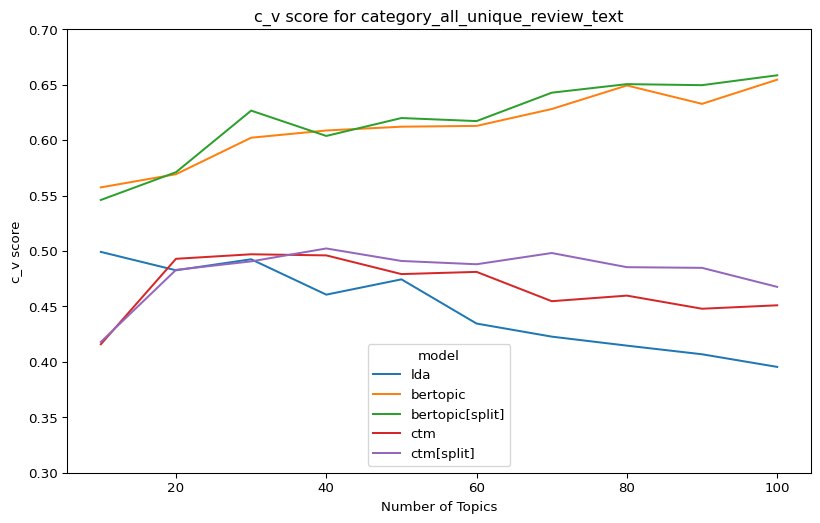

In [98]:
# create line plots for each model type, ploting c_v score

create_line_plot(
    df=log_history_df, 
    x='num_topics', 
    y='c_v', 
    hue='model_type', 
    title=f'c_v score for {str(dataset_type_folder)}', 
    xlabel='Number of Topics', 
    ylabel='c_v score',
    save_graphs=True,
    save_path=eval_results_folder_path / str(dataset_type_folder) / f'c_v_score.png'
)

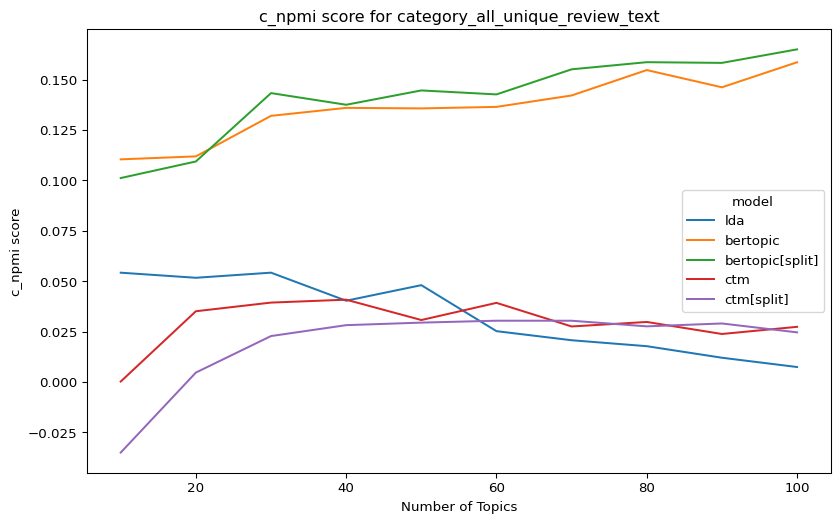

In [30]:
# create line plots for each model type, ploting c_npmi score
create_line_plot(
    df=log_history_df, 
    x='num_topics', 
    y='c_npmi', 
    hue='model_type', 
    title=f'c_npmi score for {str(dataset_type_folder)}', 
    xlabel='Number of Topics', 
    ylabel='c_npmi score',
    save_graphs=True,
    save_path=eval_results_folder_path / str(dataset_type_folder) / f'c_npmi_score.png'
)

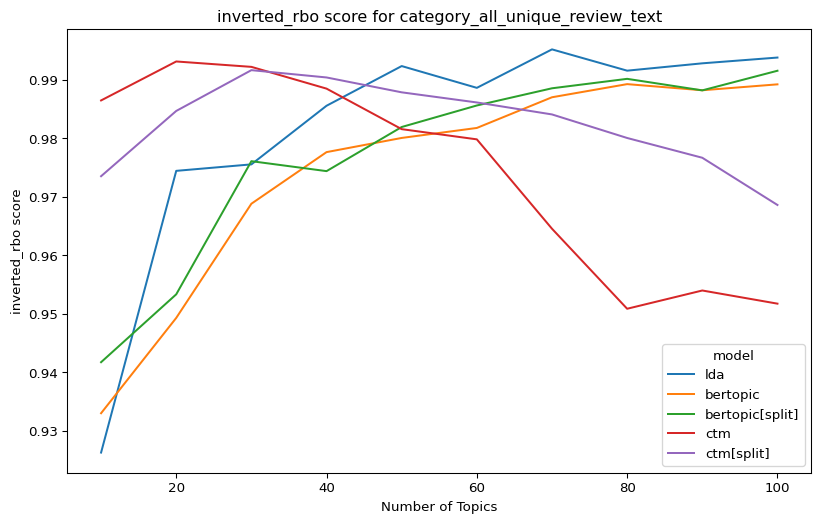

In [31]:
# create line plots for each model type, ploting inverted_rbo score
create_line_plot(
    df=log_history_df, 
    x='num_topics', 
    y='inverted_rbo', 
    hue='model_type', 
    title=f'inverted_rbo score for {str(dataset_type_folder)}', 
    xlabel='Number of Topics', 
    ylabel='inverted_rbo score',
    save_graphs=True,
    save_path=eval_results_folder_path / str(dataset_type_folder) / f'inverted_rbo_score.png'
)